Vimos como funciona os neurônios artificiais, e como eles são usados para criar redes neurais. Agora, vamos entender como funcionam os perceptrons. o perceptron pega o TLU (Threshold logic unit), as entradas e saídas são números em vez de binárias, e cada conexão de entrada está associada a um peso.TLU calcula a soma ponderada das entradas, aplica uma função degrau a essa somae gera o resultado

### funções degrais:
- heavside = 0 if z < 0, 1 if z >= 1
- sgn (signal) = -1 if z < 0, 0 se z = 0, +1 is z > 0

a fronteira de decisão de cada neurônio de saída é linear, perceptrons não conseguem aprender padrões complexos. Contudo, se as instâncias de treinamento forem linearmente separáveis, o algoritmo convergiria para uma solução, conforme o teorema da convergência do perceptron.

In [3]:
#SKLearn possui uma classe chamada perceptron, que implementa uma rede TLU única:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int64)

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

aplicar o perceptron é a mesma coisa de usar o SGDClassifier com parametros -> loss="perceptron", learning_rate="constant", eta0=1, penalty=None

Uma forma de treinar MLPs (Multi-layered percpetrons) é o algoritmo de backpropagation, que funciona basicamente como o gradiente descendente. ele calcula o gradiente passando pela rede (foward pass e back pass), e com isso calcula o erro da rede em relação a cada parâmetro. O cálculo automático dos gradientes se chama autodiff.

## Como funciona o autodiff:
- Ele manipula um mini-batch por vez e realiza o treinamento completo diversas vezes, sendo chamada cada passada de "Época"
- Cada mini-batch é passado para a camada de entrada da rede, enviando para a primeira camada oculta (camadas do meio das MLPs). O algoritmo calcula a saída de todos os neurônios nesta camada (para todas as instâncias do mini-batch). O resultado é passado para a próxima camada, saída é calculada e assim sucessivamente até obter a saída na última camada. Isso é chamado de __Forward Pass__, justamente como fazer predições, porém todos os resultados intermediários são preservados pq são necessários para o __Backward Pass__
- O algoritmo calcula o erro de saída da rede, usando uma função de perda que compara a saída desejada com a saída real e retornando uma medida de erro
- Calcula o quanto cada conexão de saída contribuiu para o erro com a regra de cadeia (chain rule)
- Ele calcula quanto das contribuções de erro veio de cada conexão na camada inferior (camada de entrada), usando a chain rule de novo, trabalhando em backward até atingingir a camada de entrada
- Por último, o algoritmo executa uma etapa do gradiente descendente para ajustar todos os pesos de conexão da rede, utilizando os gradientes de erro que acabou de calcular

Uma alteração importante feita nesse algoritmo é a substituição da função degrau para a função logística

# Implementação com Keras

In [5]:
import tensorflow as tf
keras = tf.keras

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_val, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0 # slice e escalonamento das características de entrada
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [40]:
X_test = X_test / 255.0

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
# criando o modelo usando a sequential api
model = keras.models.Sequential() # cria o modelo sequential, o modelo mais simples do Keras feito de uma pilha de camadas sequenciamente conectadas (sequential API)
model.add(keras.layers.Input(shape=(28, 28))) #primeira camada, é uma camada Input onde mostra para o modelo quando o shape do input Como é a primeira camada, deve especificar o Input, que não inclui o tamanho do batch, apenas o formato das instâncias
model.add(keras.layers.Flatten()) # converte cada imagem para uma matriz 1D.
model.add(keras.layers.Dense(300, activation='relu')) # camada oculta Dense com 300 neurônios, usando a função ReLU
model.add(keras.layers.Dense(100, activation='relu')) # camada oculta dense com 100 neurônios também usando a ReLU
model.add(keras.layers.Dense(10, activation='softmax')) #camada de saída Dense com 10 neurônios (um por classe) usando a função de ativação softmax

#as classes estão adicionadas sequencialmente para poder explicar o que cada uma faz, mas utilizariamos uma lista dentro do models.Sequential([parametros])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# podemos os parâmetros de uma camada com get_weights() e setar os pesos com set_weights()

hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [13]:
weights

array([[-0.00357838,  0.02558587,  0.06262936, ...,  0.07421964,
        -0.06124908, -0.04528575],
       [ 0.06805401, -0.03899882, -0.02736798, ..., -0.0531148 ,
         0.02955673, -0.05700425],
       [-0.04761034,  0.02603968, -0.00184901, ..., -0.00572588,
         0.07353511,  0.05915584],
       ...,
       [ 0.02609596,  0.00428832,  0.03568791, ...,  0.04272266,
        -0.05574071, -0.02947967],
       [-0.07383235,  0.039808  , -0.02038714, ...,  0.02897628,
         0.0578461 , -0.03730808],
       [-0.04052027, -0.0003162 ,  0.03951079, ...,  0.03858311,
        -0.00223412,  0.04818314]], shape=(784, 300), dtype=float32)

In [15]:
weights.shape

(784, 300)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

A camada dense inicializou os pesos de conexao aleatóriamente, o que é necessário para quebrar a simetria, e os vieses inicializados em zeros. Caso deseje usar um outro método de inicialização, pode definir _kernel_initializer_ ou _bias_initializer_ quando criar uma camada

# Compilando o modelo

após criar um modelo, deve-se chamar o método _compile()_ para especificar a função de perda e otimizadora

In [ ]:
#SparseCategoricalCrossentropy calcula a entropia cruzada entre os labels e predictions
model.compile(loss=keras.losses.SparseCategoricalCrossentropy, optimizer="sgd", metrics=['accuracy'])

Usamos a _SparseCategoricalCrossentropy_ porque temos rótulos esparsos, onde para cada instância, existe somente um índice de classe-alvo de 0 a 9, e as classes são exclusivas. Se tivéssemos uma probabilidade-alvo por classa para cada instância, precisaríamos usar o _CategoricalCrossentropy_ e não a perda.

Caso queira converter rótulos esparsos em rótulos vetoriais one-hot, use _keras.utils.to_categorical()_, e se quiser o contrário, use np.argmax(axis=1)

# Treinando e avaliando o modelo

In [ ]:
# se o desempenho do conjunto de treinamento for muito melhor do que no conjunto de validação, é provável que o modelo esteja se sobre ajustando
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7610 - loss: 0.7277 - val_accuracy: 0.8330 - val_loss: 0.5042
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8305 - loss: 0.4873 - val_accuracy: 0.8522 - val_loss: 0.4442
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8451 - loss: 0.4412 - val_accuracy: 0.8622 - val_loss: 0.4124
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8547 - loss: 0.4129 - val_accuracy: 0.8628 - val_loss: 0.3994
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8619 - loss: 0.3934 - val_accuracy: 0.8694 - val_loss: 0.3872
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8658 - loss: 0.3773 - val_accuracy: 0.8530 - val_loss: 0.4082
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8710 - loss: 0.3636 - val_accuracy: 0.8764 - val_loss: 0.3654
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8758 - loss: 0.352

Se o conjunto de treinamento estiver muito assimétrico, com algumas classes sendo mais representadas que outras, seria útil definir o argumento __class_weight__ ao chamar o método _fit()_, que daria um peso maior às classes menos representadas e menos às representadas em excesso. Se precisar de pesos por instância, substituir por __sample_weight__

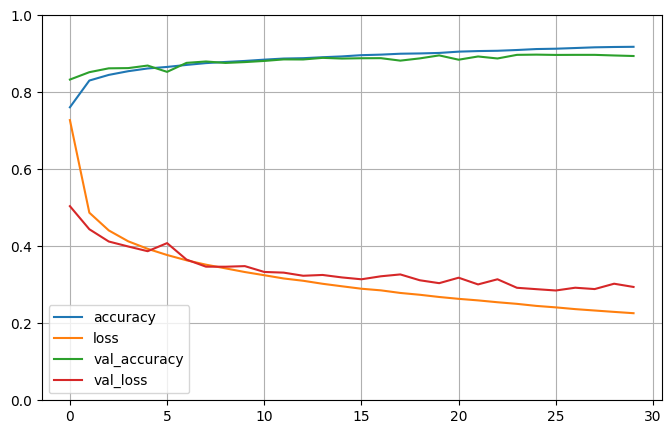

In [35]:
# o history que criamos acima, nos retorna history.params com os parâmetros de treinamento, history.epoch com a lista de épocas que passou, e history.history, com a perda e as métricas calculadas no fim de cada época
#aqui podemos plotar a curva de aprendizado

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #precisa definir o intervalo vertical para 0 até 1
plt.show()

Caso não esteja satisfeito com o desempenho, ajuste os hiperparâmetros. O primeiro a ser verificado é a taxa de aprendizado (é preciso alterar _optimizer="sgd"_ para _optimizer=keras.optimizer.SGD(lr=X)_ onde X é por padrão 0.01), e caso não ajude, testar outro otimizador (e sempre reajustar a taxa de aprendizado depois de alterar qualquer hiperparâmetro). Se ainda assim não estiver bom, ajuste os hiperparâmetros do modelo como número de camadas, o número de neurônios por camadas e os tipos de função de ativação nas camadas ocultas.

Quando estiver satisfeito com a acurária da validação do modelo, avalie no conjunto de testes para estimar o erro de generalização antes de implementar em PRD. o método para fazer isso é _evaluate()_, ele comporta vários outros argumentos como __batch_size__ e o __sample_weight__.

In [41]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8816 - loss: 0.3305


[0.3304620385169983, 0.881600022315979]

# Usando o modelo para fazer predições

podemos usar o método _predict()_ para fazermos predições em instâncias novas.

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
#se você se importa somente com a classe de maior probabilidade estimada, use o método np.argmax(model.predict(X), axis=1)
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred
np.array(class_names)[y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')